In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree   import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# Random forest
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
from sklearn.ensemble import StackingClassifier
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Dense, Dropout, TimeDistributed, Flatten
from keras.optimizers import Adam
import keras
# Cross-validation
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [17]:
data_path = "./data"
X = pd.read_csv(f'{data_path}/x_train.csv')
y = pd.read_csv(f'{data_path}/y_train.csv')
x_testing = pd.read_csv(f'{data_path}/x_test.csv')
y_testing = pd.read_csv(f'{data_path}/y_test_baseline.csv')

In [42]:
X

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,3342,15,13,350,55,2118,208,212,139,1486,...,1,0,0,0,0,0,0,0,0,0
1,2764,39,13,175,43,2648,220,210,122,366,...,0,0,0,0,0,0,0,0,0,0
2,2773,158,5,162,14,2012,226,241,149,967,...,0,0,0,0,0,0,0,0,0,0
3,3083,108,16,30,-14,2639,246,220,98,1909,...,1,0,0,0,0,0,0,0,0,0
4,3096,40,4,201,38,4592,220,231,147,2432,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406703,3066,133,10,170,30,1455,237,235,128,2624,...,0,0,0,0,0,0,0,0,0,0
406704,2308,37,31,162,38,616,202,156,71,895,...,0,0,0,0,0,0,0,0,0,0
406705,2715,73,32,342,188,1027,237,162,31,953,...,0,0,1,0,0,0,0,0,0,0
406706,3020,179,13,170,19,1471,225,247,152,450,...,0,0,0,0,0,0,0,0,0,0


In [19]:
X = X[X.columns[1:]]
X.columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4', 
'Soil_Type_1', 'Soil_Type_2','Soil_Type_3','Soil_Type_4','Soil_Type_5','Soil_Type_6','Soil_Type_7','Soil_Type_8','Soil_Type_9','Soil_Type_10',
'Soil_Type_11','Soil_Type_12','Soil_Type_13','Soil_Type_14','Soil_Type_15','Soil_Type_16','Soil_Type_17','Soil_Type_18','Soil_Type_19','Soil_Type_20',
'Soil_Type_21','Soil_Type_22','Soil_Type_23','Soil_Type_24','Soil_Type_25','Soil_Type_26','Soil_Type_27','Soil_Type_28','Soil_Type_29','Soil_Type_30',
'Soil_Type_31','Soil_Type_32','Soil_Type_33','Soil_Type_34','Soil_Type_35','Soil_Type_36','Soil_Type_37','Soil_Type_38','Soil_Type_39','Soil_Type_40']

y = y[y.columns[1:]]
y.columns=['Cover_Type']

# for testing the models
x_testing = x_testing[x_testing.columns[1:]]
x_testing.columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4', 
'Soil_Type_1', 'Soil_Type_2','Soil_Type_3','Soil_Type_4','Soil_Type_5','Soil_Type_6','Soil_Type_7','Soil_Type_8','Soil_Type_9','Soil_Type_10',
'Soil_Type_11','Soil_Type_12','Soil_Type_13','Soil_Type_14','Soil_Type_15','Soil_Type_16','Soil_Type_17','Soil_Type_18','Soil_Type_19','Soil_Type_20',
'Soil_Type_21','Soil_Type_22','Soil_Type_23','Soil_Type_24','Soil_Type_25','Soil_Type_26','Soil_Type_27','Soil_Type_28','Soil_Type_29','Soil_Type_30',
'Soil_Type_31','Soil_Type_32','Soil_Type_33','Soil_Type_34','Soil_Type_35','Soil_Type_36','Soil_Type_37','Soil_Type_38','Soil_Type_39','Soil_Type_40']
y_testing = y_testing[y_testing.columns[1:]]
y_testing.columns=['Cover_Type']

In [21]:
print(X.shape)
print(y.shape)

(406708, 54)
(406708, 1)


In [23]:
#X = X.drop(columns=["id"],inplace=True)
#y = y.drop(columns=["id"],inplace=True)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10, stratify=y['Cover_Type'])



In [27]:
# For creating the models
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)
print("x_testing: ",x_testing.shape)
print("y_testing: ",y_testing.shape)

x_train:  (284695, 54)
y_train:  (284695, 1)
x_test:  (122013, 54)
y_test:  (122013, 1)
x_testing:  (174304, 54)
y_testing:  (174304, 1)


In [29]:
X_train = copy.deepcopy(x_train)
Y_train = copy.deepcopy(y_train)
X_test = copy.deepcopy(x_test)
Y_test = copy.deepcopy(y_test)
X_testing = copy.deepcopy(x_testing)
Y_testing = copy.deepcopy(y_testing)

In [31]:
# After performing copy with dtype = int64
print("x_train: ",X_train.shape)
print("y_train: ",Y_train.shape)
print("x_test: ",X_test.shape)
print("y_test: ",Y_test.shape)
print("x_testing: ",X_testing.shape)
print("y_testing: ",Y_testing.shape)

x_train:  (284695, 54)
y_train:  (284695, 1)
x_test:  (122013, 54)
y_test:  (122013, 1)
x_testing:  (174304, 54)
y_testing:  (174304, 1)


#### Models

In [33]:
def train_random_forest(X_train, y_train):
    forest = RandomForestClassifier(n_estimators=10)
    forest.fit(X_train, y_train.values.ravel())
    return forest
def train_using_gini(X_train, y_train):
    # Gini index will prefer attributes where entropy is lower
    # Gini Index is a metric to measure how often a randomly
    # chosen element would be incorrectly identified.
    # Classifier obj
    clf_gini = DecisionTreeClassifier(criterion="gini",
        random_state=100, max_depth=3, min_samples_leaf=5)

    #train
    clf_gini.fit(X_train, y_train)
    return clf_gini
def train_using_entropy(X_train, y_train):
    clf_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=100,
        max_depth=3, min_samples_leaf=5)
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
def train_using_knn(X_train, y_train):
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train, y_train)
    return knn_model
def create_model():
        #createmodel
    model = Sequential()
    model.add(Dense(12, input_dim = 54, activation="relu"))
    model.add(Dense(8, activation = 'relu'))
    model.add(Dense(7, activation = 'sigmoid'))
    # Compile the model
    model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values: ")
    print(y_pred)
    return y_pred
def calculate_Acc(y_test, y_pred):
    print("Confusion matrix: \n")
    confusion_matrix(y_test, y_pred)
    print("Accuracy: ", accuracy_score(y_test,y_pred)*100)
    print("Report ", classification_report(y_test, y_pred))

In [12]:
Forest_model = train_random_forest(X_train, Y_train)
clf_gini = train_using_gini(X_train, Y_train)
clf_entropy = train_using_entropy(X_train, Y_train)

In [13]:
# Using splited dataset
print("X_test: ", X_test.shape)
print("Y_test: ", Y_test.shape)
y_gini = prediction(X_test, clf_gini)
print(accuracy_score(Y_test, y_gini))

X_test:  (122013, 54)
Y_test:  (122013, 1)
Predicted values: 
[1 7 3 ... 2 2 2]
0.6778703908599903


###  1. Models using all features as default:
Without any type of analysis or feature selection.

Random forest

In [14]:
# Using splited dataset
print("X_test: ", X_test.shape)
print("Y_test: ", Y_test.shape)
y_forest = prediction(X_test, Forest_model)
print(accuracy_score(y_test, y_forest))
# Using real testing set
print("X_testing: ", X_testing.shape)
print("Y_testing: ", Y_testing.shape)
y_forest_real = Forest_model.predict(x_testing)
print(accuracy_score(y_testing, y_forest_real))

X_test:  (122013, 54)
Y_test:  (122013, 1)
Predicted values: 
[1 7 3 ... 2 2 2]
0.9288682353519707
X_testing:  (174304, 54)
Y_testing:  (174304, 1)
Predicted values: 
[5 1 2 ... 7 2 2]
0.46717229667706994


<Figure size 432x288 with 0 Axes>

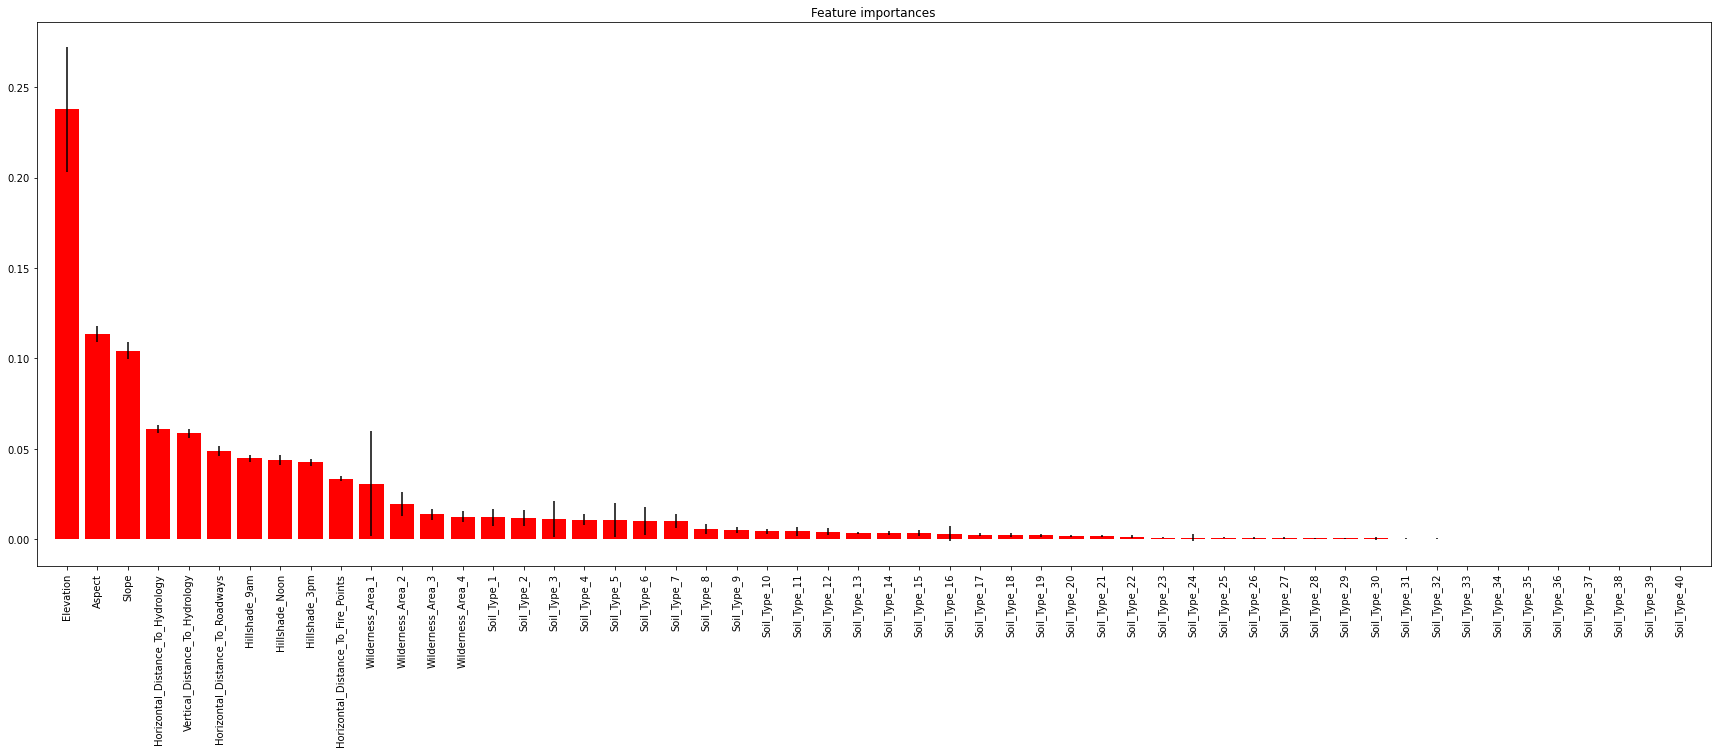

In [15]:
importances = Forest_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in Forest_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
#print("Feature ranking:")
#for f in range(X.shape[1]):
#    print("%50s feature %d (%f)" % (X.columns[f], indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.figure(figsize=(30, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

### Feature selection N1

In [18]:
fields = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', ]
X_change = X[fields]
x_test_change= x_testing[fields]

In [20]:
print(X.shape)
print(X_change.shape)
print(y.shape)
print(x_test_change.shape)
print(y_testing.shape)

(406708, 54)
(406708, 10)
(406708, 1)
(174304, 10)
(174304, 1)


In [22]:
forest = RandomForestClassifier(n_estimators=5)

forest.fit(X_change, y.values.ravel())

RandomForestClassifier(n_estimators=5)

In [24]:
y_pred = forest.predict(x_test_change)
print(accuracy_score(y_testing, y_pred))

0.4575741233706628


### Model  using Keras -sequential

In [26]:
# Normalize data
X_train = tf.keras.utils.normalize(X)
#Y_train = tf.keras.utils.normalize(Y_train).T
print(X_train.shape)
print(Y_train.values.ravel().shape)
model = create_model()

(406708, 54)
(284695,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                660       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 63        
Total params: 827
Trainable params: 827
Non-trainable params: 0
_________________________________________________________________


In [28]:
from sklearn.preprocessing import LabelBinarizer
ytest = LabelBinarizer().fit_transform(Y_train)

ytest.shape

(284695, 7)

In [30]:
model.fit(X_train,ytest, epochs=3, batch_size=10,  verbose=2)

Epoch 1/3
28470/28470 - 46s - loss: 0.3410 - accuracy: 0.4859
Epoch 2/3
28470/28470 - 40s - loss: 0.2830 - accuracy: 0.4876
Epoch 3/3
28470/28470 - 26s - loss: 0.2830 - accuracy: 0.4876


In [32]:
# to make it work I have to revert the 
y_pred = model.predict(x_testing)
y_pred.shape[0]

174304

In [34]:

print(accuracy_score(y_testing, y_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

### Using Decision tree Gini index

In [36]:
# Operational Phase 
print("Results Using Gini Index:") 
y_pred_gini = prediction(X_test, clf_gini)
calculate_Acc(Y_test, y_pred_gini)
print("Results Using Gini Index with real testing set:") 
y_pred_gini = prediction(X_testing, clf_gini)
calculate_Acc(y_testing, y_pred_gini)


Results Using Gini Index:
Predicted values: 
[1 7 3 ... 2 2 2]
Confusion matrix: 

Accuracy:  67.78703908599904
Report                precision    recall  f1-score   support

           1       0.65      0.69      0.67     44487
           2       0.73      0.73      0.73     59493
           3       0.59      0.80      0.68      7508
           4       0.37      0.44      0.40       577
           5       0.00      0.00      0.00      1994
           6       0.00      0.00      0.00      3647
           7       0.55      0.46      0.50      4307

    accuracy                           0.68    122013
   macro avg       0.41      0.45      0.43    122013
weighted avg       0.65      0.68      0.66    122013

Results Using Gini Index with real testing set:
Predicted values: 
[2 1 2 ... 7 2 2]
Confusion matrix: 

Accuracy:  48.67874518083349
Report                precision    recall  f1-score   support

           1       0.80      0.55      0.65     99239
           2       0.17      0.8

In [37]:
# Fit the model
#knn_model = train_using_knn(X_train, Y_train)

# 2. Stacking Scikit-Learn API

In [38]:
# Checking  scikit-learn version
import sklearn
print(sklearn.__version__)

0.23.2


Specifically, we will evaluate the following five algorithms:

1. Logistic Regression.
2. k-Nearest Neighbors.
3. Decision Tree.
4. Support Vector Machine.
5. Naive Bayes.

In [39]:
# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()    
	models['stacking'] = get_stacking()
	return models

The evaluate_model() function below takes a model instance and returns a list of scores from three repeats of stratified 10-fold cross-validation

In [40]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [41]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, Y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

NameError: name 'get_stacking' is not defined

In [ ]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
knn_model = models['knn'].fit(X_train, y_train)

In [ ]:
print('Prediction using KNN')
y_pred_knn = prediction(X_test, clf_gini)
calculate_Acc(Y_test, y_pred_knn)
